EE120 Fall 2016 PS 8, Quadrature amplitude modulation for 4 channels

To ouput python notebook to printable format, use ``ipython nbconvert file.ipynb'' from command prompt. You may need to install pandoc first.

In [12]:
print 4+5  # check to see if iPython is running...

9


In [13]:
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
import numpy as np
import scipy as sp
print 'imported numpy and scipy'
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile
print 'numpy version is', np.__version__
print 'finished importing'

imported numpy and scipy
numpy version is 1.9.2
finished importing


In [15]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [16]:
# Write signal to .wav files after down sampling by 16 and scaling
def wavwrite(name,sig,length):
    rate1 = 44100 # CD audio quality,
    out = np.zeros(length/16)
    out=sig.real[0:length:16] # downsample
    scale = 32767.0/(max(np.max(out),-np.min(out)))
    out = np.multiply(scale,out)
    wavfile.write(name, rate1, out.astype(np.int16)) # 16 bit integer
    print 'wrote file',name

In [17]:
# import file
from scipy.io import wavfile
rate,data= wavfile.read('xmit-signal.wav')  # 16 bit data from transmitter
print 'rate =', rate
print 'data =', data
length = np.size(data)
print 'length  = ', length
k = np.linspace(0,length-1,length)

####################
# parameters used:
dt = 1.0/(44.1*16)*1e-3  # sample period
print 'Ts =', dt
time = dt * np.linspace(0,length-1,length)
signal = np.zeros(length)
omega_c = 2.0 * np.pi * 3e5
omega_d = 2.0 * np.pi * 3.16e5  # use channel spacing of 16 kHz

rate = 44100
data = [ -837   414   -10 ..., -1665  1308  -870]
length  =  4194304
Ts = 1.41723356009e-06


Need to specify $k_{min}$, $k_{max}$, $k_{c}$, $k_{d}$ parameters in next cell.

In [23]:
##################
## PARAMETERS TO BE DETERMINED

kc = np.int(length*omega_c/(2*np.pi/dt)) # CHANGE THIS
kd = np.int(length*omega_d/(2*np.pi/dt)) # change this
print 'k at wc=', kc
print 'k at wd=', kd

k_min = 48000  # change this value
k_max = 3*48000  # kc+full width of omega_d channel

k at wc= 1783292
k at wd= 1878401


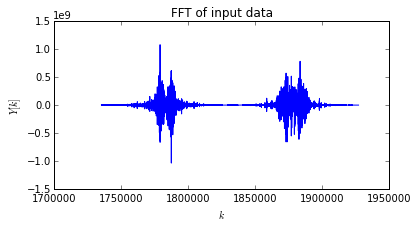

In [24]:
# plot FFT of modulated signal near carrier frequency
kcarrier = kc
Y = np.fft.fft(data)  
setup_graph(title='FFT of input data', x_label='$k$', y_label='$Y[k]$', fig_size=(6,3))
_ = plt.plot(k[kcarrier-k_min:kcarrier+k_max],Y[kcarrier-k_min:kcarrier+k_max])

Specify digital low pass filter $H[k]$ with cutoff of 8 kHz

In [26]:
# specify low pass filter
H = np.zeros(length)
k_cutoff =  np.int(length*8.00e3*dt)
print 'reconstruction k_cutoff =', k_cutoff
# need hanning window to keep from ringing 
H[0:k_cutoff+1]=16
H[length-k_cutoff:length]=16 # setup low pass filter with high and low

reconstruction k_cutoff = 47554


In the next cell enter code for calculating recovered signals s1[n], s2[n], s3[n], s4[n]

In [27]:
# code here to extract s1....s4 from ``data''
time = dt * np.linspace(0,length-1,length)
coswc = np.cos(omega_c*time) 
coswd = np.cos(omega_d*time) 
sinwc = np.sin(omega_c*time) 
sinwd = np.sin(omega_d*time) 
print 'cos/sin setup done'

# convert to baseband then filter
sig1 = np.multiply(coswc,data)
sig2 = np.multiply(sinwc,data)
sig3 = np.multiply(coswd,data)
sig4 = np.multiply(sinwd,data)
print 'convert to baseband'

cos/sin setup done
convert to baseband


In [28]:
# perform filtering and write data
#low pass first channel
Sig1 = np.fft.fft(sig1)       
Y = np.multiply(Sig1,H)
s1 = np.fft.ifft(Y)

Sig2 = np.fft.fft(sig2)       
Y = np.multiply(Sig2,H)
s2 = np.fft.ifft(Y)

Sig3 = np.fft.fft(sig3)       
Y = np.multiply(Sig3,H)
s3 = np.fft.ifft(Y)

Sig4 = np.fft.fft(sig4)       
Y = np.multiply(Sig4,H)
s4 = np.fft.ifft(Y)

In [29]:
# this cell writes all data for you, and plots S1[k]
wavwrite('sig1.wav',s1,length)
wavwrite('sig2.wav',s2,length)
wavwrite('sig3.wav',s3,length)
wavwrite('sig4.wav',s4,length)

wrote file sig1.wav
wrote file sig2.wav
wrote file sig3.wav
wrote file sig4.wav


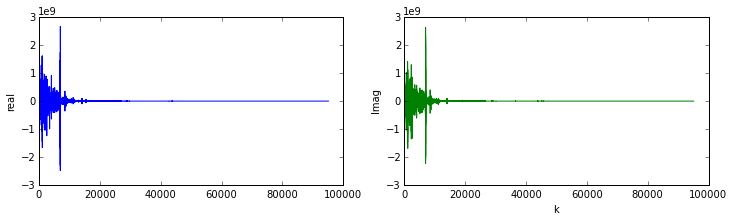

In [30]:
# plot FFT of s1
Sig1 = np.fft.fft(s1)   
setup_graph(title='FFT of s1', x_label='$k$', y_label='$S1[k]$', fig_size=(12,3))
plt.subplot(1,2,1)
_ = plt.plot(k[0:2*k_cutoff],Sig1.real[0:2*k_cutoff],'b')
ylabel('real')
plt.subplot(1,2,2)
_ = plt.plot(k[0:2*k_cutoff],Sig1.imag[0:2*k_cutoff],'g')
ylabel('Imag')
xlabel('k')